### Exam 1 Solution 

The required libraries are imported into the notebook

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

The train and test csv files for Diabetic Patient dataset is loaded into dataframes

In [218]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       268 non-null    int64  
 1   B       268 non-null    int64  
 2   C       268 non-null    int64  
 3   D       181 non-null    float64
 4   E       141 non-null    float64
 5   F       265 non-null    float64
 6   G       268 non-null    float64
 7   H       268 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 16.9 KB


In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       500 non-null    int64  
 1   B       500 non-null    int64  
 2   C       500 non-null    int64  
 3   D       360 non-null    float64
 4   E       253 non-null    float64
 5   F       492 non-null    float64
 6   G       500 non-null    float64
 7   H       500 non-null    int64  
 8   Target  500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Data Cleaning

The data contains null values in columns D, E and F.
\
We are filling the null values with the median of respective column.

In [329]:
train=train.fillna(train.median())

In [330]:
train

,A,B,C,D,E,F,G,H,Target
0,5,122,86,27.0,67.0,34.7,0.290,33,0
1,2,175,88,27.0,67.0,22.9,0.326,22,0
2,4,129,86,2.0,27.0,35.1,0.231,23,0
3,12,92,62,7.0,258.0,27.6,0.926,44,1
4,3,102,44,2.0,94.0,3.8,0.400,26,0
...,...,...,...,...,...,...,...,...,...
495,1,97,64,19.0,82.0,18.2,0.299,21,0
496,1,136,74,5.0,24.0,37.4,0.399,24,0
497,8,95,72,27.0,67.0,36.8,0.485,57,0
498,4,90,0,27.0,67.0,28.0,0.610,31,0


Splitting the train dataset into x and y to plot a scatter matrix for visualization of dataset.

In [232]:
x = train.iloc[:,:8]
y = train['Target']

#### Visualization of Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B4F715E548>,
      dtype=object)

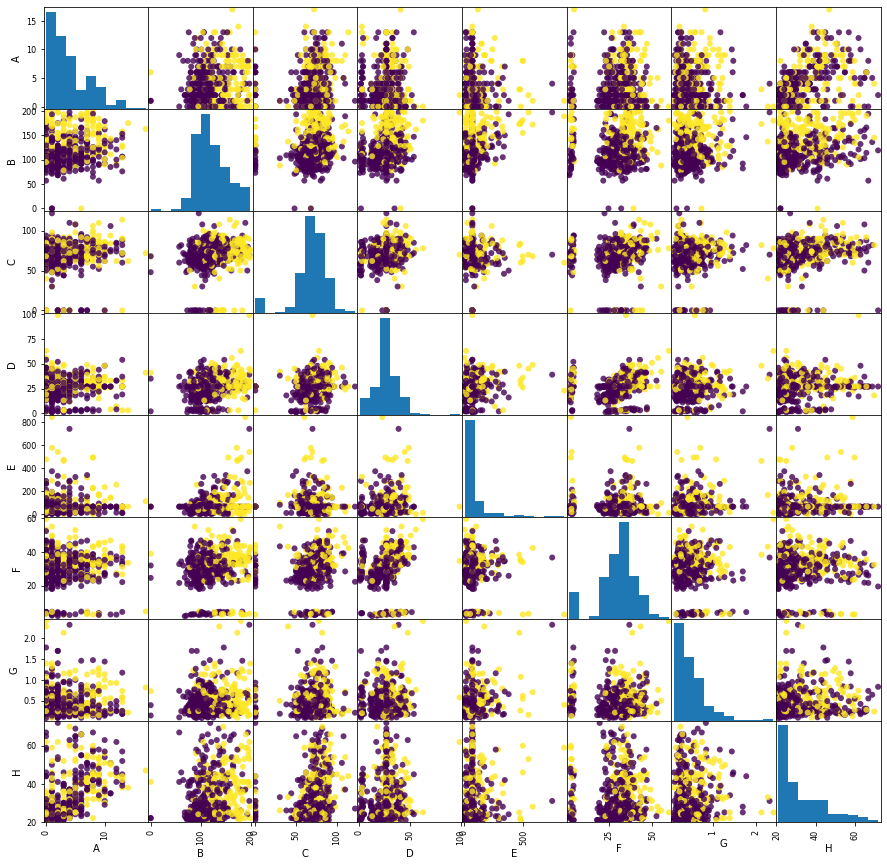

In [331]:
from pandas.plotting import scatter_matrix

attributes = train.columns[:8]
scatter_matrix(train[attributes], figsize = (15,15), c=train['Target'], alpha = 0.8, marker = 'O')

#### Splitting the dataset into training and test datasets

In [236]:
from sklearn.model_selection import train_test_split

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, random_state = 0)

#### Scaling the dataset

In [351]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

### K- nearest Neighbours Classifier

In [243]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    train_score_array.append(knn.score(x_train, y_train))
    test_score_array.append(knn.score(x_test, y_test))

#### To find the optimum value of K

We match the accuracy with K-nearest neighbours from 1 to 20, to determine the optimal number of neighbours for the algorithm.

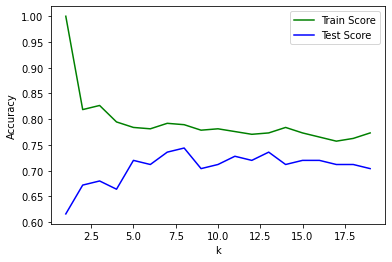

In [244]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k - nearest neighbours')
plt.ylabel('Accuracy')
plt.legend()

From the above graph, we are deducing that the optimal number of neighbours is 8.

In [333]:
knn = KNeighborsClassifier(8)
knn.fit(x_train, y_train)
print('Train score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(x_test, y_test)))

Train score: 0.7893
Test score: 0.7440


#### K-Nearest Neighbours result.

The following were the accuracy results of KNN classifier.
\
Train score for KNN algorithm: 0.7893
\
Test score for KNN algorithm: 0.7440

The following is the visualization of decision boundary for KNN Classifier.

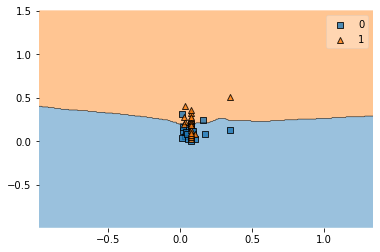

In [334]:
from mlxtend.plotting import plot_decision_regions

x_b = x_train[75:125,[4,6]]
y_b = y_train[75:125].to_numpy()

knn = KNeighborsClassifier(8)
knn.fit(x_b, y_b) 

plot_decision_regions(x_b, y_b, clf = knn)

### K-Nearest Neighbours Regressor 

Text(0, 0.5, 'MSE')

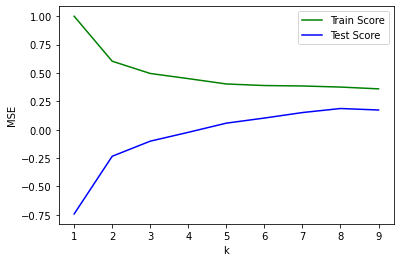

In [295]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))
    
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [287]:
knn_reg = KNeighborsRegressor(8)
knn_reg.fit(x_train, y_train)

print(knn_reg.score(x_train,y_train))
print(knn_reg.score(x_test,y_test))

0.37581851532504695
0.1867650261324043


In [263]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(x_train, y_train)
print(lreg.score(x_train, y_train))
print(lreg.score(x_test, y_test))

0.32353156564176855
0.23453730746212398


The regression models KNN regressor and Linear Regression do not provide a good solution.

### Logistic Regression 

In [299]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'saga')
    log_l1.fit(x_train, y_train)
    log_l2.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))
    test_score_l2.append(log_l2.score(x_test, y_test))

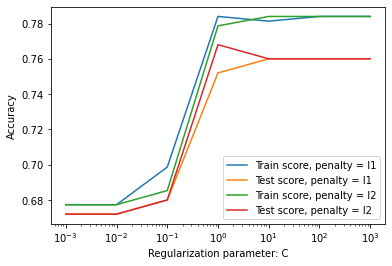

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

From the above graph, it is deduced that the optimal penalty is l2 with c value 1. 
\
We are running a regression model below with penalty l2 and c = 1.

In [279]:
logreg = LogisticRegression(penalty = 'l2', C = 1, solver = 'saga')
logreg.fit(x_train,y_train)

print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))

0.7786666666666666
0.768


#### Logistic Regression Result 

The following were the accuracy results of Logistic Regression.
\
Train score for Logistic Regression: 0.7786
\
Test score for Logistic Regression: 0.768

### Linear SVC 

In [284]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x_train,y_train)

print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.784
0.752


#### Linear SVC Result

The following were the accuracy results of Linear SVC.
\
Train score for Linear SVC: 0.784
\
Test score for Linear SVC: 0.752

### SVC with linear kernel

In [337]:
from sklearn.svm import SVC

c_values = [0.01,0.1,1,10]

for c in c_values:
    clf1 = SVC(kernel='linear', C=c)
    clf1.fit(x_train,y_train)
    
    print("For c value", c ," Train score is " ,clf1.score(x_train,y_train))
    print("For c value", c ," Test score is " ,clf1.score(x_test,y_test))
    print("\n")

For c value 0.01  Train score is  0.6773333333333333
For c value 0.01  Test score is  0.672


For c value 0.1  Train score is  0.6746666666666666
For c value 0.1  Test score is  0.68


For c value 1  Train score is  0.7946666666666666
For c value 1  Test score is  0.752


For c value 10  Train score is  0.8
For c value 10  Test score is  0.76




From the above results, the most optimal c value is 10. 

In [339]:
clf1 = SVC(kernel='linear', C=c)
clf1.fit(x_train,y_train)

print(clf1.score(x_train,y_train))
print(clf1.score(x_test,y_test))

0.8
0.76


#### SVC with Linear Kernel Result

The following were the accuracy results of SVC with Linear Kernel.
\
Train score for SVC with Linear Kernel: 0.8
\
Test score for SVC with Linear Kernel: 0.76

### SVC with RBF Kernel 

In [325]:
c_values = [0.01,0.1,1,10]
gamma_values = [0.01,0.1,1,10]

for c in c_values: 
    for g in gamma_values:
        clf2 = SVC(kernel='rbf', gamma=g, C=c)
        clf2.fit(x_train,y_train)
        
        print("For c value", c ,"and gamma value", g ," Train score is " ,clf2.score(x_train,y_train))
        print("For c value", c ,"and gamma value", g ," Test score is " ,clf2.score(x_test,y_test))
        print("\n")

For c value 0.01 and gamma value 0.01  Train score is  0.6773333333333333
For c value 0.01 and gamma value 0.01  Test score is  0.672


For c value 0.01 and gamma value 0.1  Train score is  0.6773333333333333
For c value 0.01 and gamma value 0.1  Test score is  0.672


For c value 0.01 and gamma value 1  Train score is  0.6773333333333333
For c value 0.01 and gamma value 1  Test score is  0.672


For c value 0.01 and gamma value 10  Train score is  0.6773333333333333
For c value 0.01 and gamma value 10  Test score is  0.672


For c value 0.1 and gamma value 0.01  Train score is  0.6773333333333333
For c value 0.1 and gamma value 0.01  Test score is  0.672


For c value 0.1 and gamma value 0.1  Train score is  0.6773333333333333
For c value 0.1 and gamma value 0.1  Test score is  0.672


For c value 0.1 and gamma value 1  Train score is  0.6773333333333333
For c value 0.1 and gamma value 1  Test score is  0.672


For c value 0.1 and gamma value 10  Train score is  0.6773333333333333
For

From the above results, the most optimal c value is 1 and the most optimal gamma value is also 1.

In [340]:
clf2 = SVC(kernel='rbf', gamma=1, C=1)
clf2.fit(x_train,y_train)

print(clf2.score(x_train,y_train))
print(clf2.score(x_test,y_test))

0.8106666666666666
0.784


#### SVC with RBF Kernel Result

The following were the accuracy results of SVC with RBF Kernel.
\
Train score for SVC with RBF Kernel: 0.81
\
Test score for SVC with RBF Kernel: 0.784

### SVC with Polynomial Kernel

In [328]:
poly = [2,3,4,5]

for c in c_values: 
    for p in poly:
        clf3 = SVC(kernel='poly', degree=p, C=c)
        clf3.fit(x_train,y_train)
        
        print("For c value", c ,"and degree", p ," Train score is " ,clf3.score(x_train,y_train))
        print("For c value", c ,"and degree", p ," Test score is " ,clf3.score(x_test,y_test))
        print("\n")

For c value 0.01 and degree 2  Train score is  0.6773333333333333
For c value 0.01 and degree 2  Test score is  0.672


For c value 0.01 and degree 3  Train score is  0.6773333333333333
For c value 0.01 and degree 3  Test score is  0.672


For c value 0.01 and degree 4  Train score is  0.6773333333333333
For c value 0.01 and degree 4  Test score is  0.672


For c value 0.01 and degree 5  Train score is  0.6773333333333333
For c value 0.01 and degree 5  Test score is  0.672


For c value 0.1 and degree 2  Train score is  0.6773333333333333
For c value 0.1 and degree 2  Test score is  0.672


For c value 0.1 and degree 3  Train score is  0.6773333333333333
For c value 0.1 and degree 3  Test score is  0.672


For c value 0.1 and degree 4  Train score is  0.6773333333333333
For c value 0.1 and degree 4  Test score is  0.672


For c value 0.1 and degree 5  Train score is  0.6773333333333333
For c value 0.1 and degree 5  Test score is  0.672


For c value 1 and degree 2  Train score is  0.67

From the above results, the optimal value for c is 10 and the optimal degree is 2.

In [342]:
clf3 = SVC(kernel='poly', degree=2, C=10)
clf3.fit(x_train,y_train)

print(clf3.score(x_train,y_train))
print(clf3.score(x_test,y_test))

0.7973333333333333
0.744


#### SVC with Polynomial Kernel Result

The following were the accuracy results of SVC with Polynomial Kernel.
\
Train score for SVC with Polynomial Kernel: 0.7973
\
Test score for SVC with Polynomial Kernel: 0.744

### Decision Tree Classifier

In [301]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)

print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

1.0
0.664


In [306]:
depth = [1,2,3,4,5,6,7,8,9,10]

for d in depth:
    dtree1 = DecisionTreeClassifier(max_depth = d, random_state=0)
    dtree1.fit(x_train, y_train)
    
    print("For max_depth", d ," Train score is " ,dtree1.score(x_train,y_train))
    print("For max_depth", d ," Test score is " ,dtree1.score(x_test,y_test))
    print("\n")

For max_depth 1  Train score is  0.7866666666666666
For max_depth 1  Test score is  0.72


For max_depth 2  Train score is  0.8
For max_depth 2  Test score is  0.72


For max_depth 3  Train score is  0.8213333333333334
For max_depth 3  Test score is  0.712


For max_depth 4  Train score is  0.832
For max_depth 4  Test score is  0.712


For max_depth 5  Train score is  0.8373333333333334
For max_depth 5  Test score is  0.728


For max_depth 6  Train score is  0.864
For max_depth 6  Test score is  0.664


For max_depth 7  Train score is  0.9013333333333333
For max_depth 7  Test score is  0.68


For max_depth 8  Train score is  0.928
For max_depth 8  Test score is  0.704


For max_depth 9  Train score is  0.952
For max_depth 9  Test score is  0.664


For max_depth 10  Train score is  0.9706666666666667
For max_depth 10  Test score is  0.664




From the above results the optimal depth for decision tree is 5.

In [344]:
dtree1 = DecisionTreeClassifier(max_depth = 5, random_state=0)
dtree1.fit(x_train, y_train)

print(dtree1.score(x_train,y_train))
print(dtree1.score(x_test,y_test))

0.8373333333333334
0.728


### Decision Tree Result
The following were the accuracy results of Decision Tree.
\
Train score for SVC with Decision Tree: 0.8373
\
Test score for SVC with Decision Tree: 0.728

In [332]:
result = pd.DataFrame({'Feature importance' : dtree.feature_importances_}, index=x_train_org.columns).sort_values(by='Feature importance', ascending=False)
result

,Feature importance
B,0.381803
F,0.157339
G,0.153000
A,0.077789
H,0.075223
D,0.064760
E,0.054978
C,0.035108


The above table depicts the features by importance. Concentration of plasma glucose is the most important feature. 

### Prediction 

From the results of models above, we see that the SVC with RBF kernel model has the maximum accuracy. 

#### Hence we are choosing the SVC with RBF kernel model for prediction.

In [347]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       268 non-null    int64  
 1   B       268 non-null    int64  
 2   C       268 non-null    int64  
 3   D       181 non-null    float64
 4   E       141 non-null    float64
 5   F       265 non-null    float64
 6   G       268 non-null    float64
 7   H       268 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 16.9 KB


Replacing Null values using Median

In [348]:
test=test.fillna(test.median())

In [352]:
test1 = scaler.transform(test)

In [353]:
svc_rbf = SVC(kernel='rbf', gamma=1, C=1)
svc_rbf.fit(x_train,y_train)
test_svc_rbf = svc_rbf.predict(test1)

test_svc_rbf

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [356]:
np.savetxt("saradha_ramakrishnan_prediction.csv", test_svc_rbf, delimiter=",")